# 利用各國股市收盤價預測台灣股市收盤價
我們知道各國的股市收盤時間是不一樣的，我們可以根據這一點使用已經收盤的股市來預測台灣股市最後的走向。

## 1. 查詢各國股市收盤時間

![stock time](stock_time.jpg)

根據圖中所提供的各地股市交易時間一覽表，台灣的最後的收盤時間是13:30，而收盤時間較台灣早的則有紐西蘭的13:00以及澳洲的14:00，這兩個地區可以直接使用當天的資料，而其他地方的股市我們取只能前一天的資料來當做預測模型的輸入。

## 2. 下載Yahoo Finace中下載各國的股市資料

![World Indices](world_indices_20240502.jpg)

參考連結：https://finance.yahoo.com/world-indices

## 3. 讀入股市資料並進行資料清理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

C:\Users\twp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 讀取 Yahoo Finiance 的股市歷史資料集  https://finance.yahoo.com/ (historical data)  

In [ ]:
pip install yfinance --upgrade --no-cache-dir

## 讀取 Apple 股票資訊

[*********************100%%**********************]  1 of 1 completed


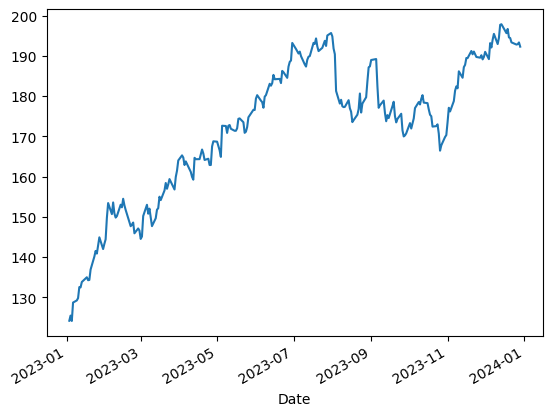

In [1]:
import yfinance as yf
# Get the data for the stock AAPL
data = yf.download('AAPL','2023-01-01','2023-12-31')

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

## 讀取/儲存 Taiwan 歷史股票資訊

In [82]:
# Get the data of Taiwan for year of 2023 

stockdata_TW = yf.download('^TWII','2023-01-01','2023-12-31')

# Plot the close price of Taiwan stock in year of 2023
stockdata_TW['Adj Close'].plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


In [83]:
stockdata_TW.head()

Open          High           Low         Close  \
Date                                                                 
2023-01-03  14108.160156  14237.940430  14001.969727  14224.120117   
2023-01-04  14186.950195  14257.450195  14177.969727  14199.129883   
2023-01-05  14285.120117  14357.599609  14270.929688  14301.049805   
2023-01-06  14278.519531  14384.919922  14278.519531  14373.339844   
2023-01-09  14504.469727  14752.209961  14504.469727  14752.209961   

               Adj Close   Volume  
Date                               
2023-01-03  14224.120117  1816400  
2023-01-04  14199.129883  2073800  
2023-01-05  14301.049805  2086500  
2023-01-06  14373.339844  1741200  
2023-01-09  14752.209961  2581100

## 儲存 台灣2023年的歷史股票資訊

In [119]:
stockdata_TW.to_csv('data_New/data_TW_2023.csv')

## 儲存 台灣及其他不同國家歷史股票資訊

In [129]:
# Get the historical stock data of all other interested counties for 2023 
stockdata_AORD = yf.download('^AORD','2023-01-01','2023-12-31')
stockdata_AXJO = yf.download('^AXJO','2023-01-01','2023-12-31')
stockdata_BFX = yf.download('^BFX','2023-01-01','2023-12-31')
stockdata_BSESN = yf.download('^BSESN','2023-01-01','2023-12-31')
stockdata_BUK100P = yf.download('^BUK100P','2023-01-01','2023-12-31')
stockdata_BVSP = yf.download('^BVSP','2023-01-01','2023-12-31')
stockdata_DJI = yf.download('^DJI','2023-01-01','2023-12-31')
stockdata_FCHI = yf.download('^FCHI','2023-01-01','2023-12-31')
stockdata_GDAXI = yf.download('^GDAXI','2023-01-01','2023-12-31')
stockdata_GSPC = yf.download('^GSPC','2023-01-01','2023-12-31')
stockdata_GSPTSE = yf.download('^GSPTSE','2023-01-01','2023-12-31')
stockdata_HSI = yf.download('^HSI','2023-01-01','2023-12-31')
stockdata_JKSE = yf.download('^JKSE','2023-01-01','2023-12-31')
stockdata_KS11 = yf.download('^KS11','2023-01-01','2023-12-31')
stockdata_MXX = yf.download('^MXX','2023-01-01','2023-12-31')
stockdata_N225 = yf.download('^N225','2023-01-01','2023-12-31')
stockdata_NYA = yf.download('^NYA','2023-01-01','2023-12-31')
stockdata_NZ50 = yf.download('^NZ50','2023-01-01','2023-12-31')
stockdata_RUT = yf.download('^RUT','2023-01-01','2023-12-31')
stockdata_STOXX50E = yf.download('^STOXX50E','2023-01-01','2023-12-31')
stockdata_TA_125TA = yf.download('^TA125.TA','2023-01-01','2023-12-31')
stockdata_XAX = yf.download('^XAX','2023-01-01','2023-12-31')
stockdata_000001_SS = yf.download('000001.SS','2023-01-01','2023-12-31')
stockdata_IMOEX_ME = yf.download('IMOEX.ME','2023-01-01','2023-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [130]:
# Save to indicidual files for different contries
stockdata_TW.to_csv('data_New/^TWII.csv')
stockdata_AORD.to_csv('data_New/^AORD.csv')
stockdata_AXJO.to_csv('data_New/^AXJO.csv')
stockdata_BFX.to_csv('data_New/^BFX.csv')
stockdata_BSESN.to_csv('data_New/^BSESN.csv')
stockdata_BUK100P.to_csv('data_New/^BUK100P.csv')
stockdata_BVSP.to_csv('data_New/^BVSP.csv')
stockdata_DJI.to_csv('data_New/^DJI.csv')
stockdata_FCHI.to_csv('data_New/^FCHI.csv')
stockdata_GDAXI.to_csv('data_New/^GDAXI.csv')
stockdata_GSPC.to_csv('data_New/^GSPC.csv')
stockdata_GSPTSE.to_csv('data_New/^GSPTSE.csv')
stockdata_HSI.to_csv('data_New/^HSI.csv')
stockdata_JKSE.to_csv('data_New/^JKSE.csv')
stockdata_KS11.to_csv('data_New/^KS11.csv')
stockdata_MXX.to_csv('data_New/^MXX.csv')
stockdata_N225.to_csv('data_New/^N225.csv')
stockdata_NYA.to_csv('data_New/^NYA.csv')
stockdata_NZ50.to_csv('data_New/^NZ50.csv')
stockdata_RUT.to_csv('data_New/^RUT.csv')
stockdata_STOXX50E.to_csv('data_New/^STOXX50E.csv')
stockdata_TA_125TA.to_csv('data_New/^TA125.TA.csv')
stockdata_XAX.to_csv('data_New/^XAX.csv')
stockdata_000001_SS.to_csv('data_New/^000001.SS.csv')
stockdata_IMOEX_ME.to_csv('data_New/^IMOEX.ME.csv')

### 讀入股票代碼對應的地區資料並根據需要分組

In [131]:
# 將股票代碼對應的地區資料讀入
area = pd.read_csv('data_New/area.csv')
area

Code           Area
0        ^AORD      Australia
1        ^AXJO      Australia
2         ^BFX        Belgium
3       ^BSESN          India
4     ^BUK100P  UnitedKingdom
5        ^BVSP  UnitedKingdom
6         ^DJI   UnitedStates
7        ^FCHI         France
8       ^GDAXI        Germany
9        ^GSPC   UnitedStates
10     ^GSPTSE   UnitedStates
11        ^HSI       HongKong
12       ^JKSE      Indonesia
13       ^KS11      Indonesia
14        ^MXX         Mexico
15       ^N225          Japan
16        ^NYA   UnitedStates
17       ^NZ50   UnitedStates
18        ^RUT   UnitedStates
19   ^STOXX50E         Europe
20   ^TA125.TA         Israel
21       ^TWII         Taiwan
22        ^XAX   UnitedStates
23  ^000001.SS          China
24   ^IMOEX.ME         Russia

In [133]:
# 將股市代號分為:
# 1. 收盤時間同一日，但是比台灣收盤時間稍早的股市代號(earlier_stocks)，例如澳洲、紐西蘭、日本等
# 2. 收盤時間較台灣晚的股市代號(later_stocks), 例如歐洲及美國等國家
#    如果是因為收盤時間比台灣較晚,若要使用這些股市來進行預測,則需使用相對前一日的收盤資料進行當日的預測分析
earlier_taiwan_contries = ['Australia', 'NewZealand', 'Japan']  # 收盤時間同一日但稍早於台灣的國家
taiwan_stock = '^TWII'  # 台灣股市代號(TSEC weighted index)
earlier_stocks = list(
    area[area['Area'].isin(earlier_taiwan_contries)]['Code'])
later_stocks = list(
    area[~area['Area'].isin(earlier_taiwan_contries)]['Code'])
later_stocks.remove(taiwan_stock)

print(f'Taiwan: {taiwan_stock}')
print(f'Closing time on the same day but earlier than Taiwan: {earlier_stocks}')
print(f'Closing time Later than Taiwan: {later_stocks}')

Taiwan: ^TWII
Closing time on the same day but earlier than Taiwan: ['^AORD', '^AXJO', '^N225']
Closing time Later than Taiwan: ['^BFX', '^BSESN', '^BUK100P', '^BVSP', '^DJI', '^FCHI', '^GDAXI', '^GSPC', '^GSPTSE', '^HSI', '^JKSE', '^KS11', '^MXX', '^NYA', '^NZ50', '^RUT', '^STOXX50E', '^TA125.TA', '^XAX', '^000001.SS', '^IMOEX.ME']


### 撰寫讀取股市資料的函式

In [134]:
def read_stock(code):
    """讀入對應代號的股票資料"""
    file_path = f'./data_New/{code}.csv'
    index = pd.read_csv(file_path)
    index = index[['Date', 'Close']]
    index['Date'] = pd.to_datetime(index['Date'])
    index.rename(columns={'Close': code}, inplace=True)
    return index

# 測試函式輸出
read_stock(taiwan_stock).head()

Date         ^TWII
0 2023-01-03  14224.120117
1 2023-01-04  14199.129883
2 2023-01-05  14301.049805
3 2023-01-06  14373.339844
4 2023-01-09  14752.209961

### 將所有股市資料讀入並合併

In [135]:
# 讀入台灣股市資料
stock = read_stock(taiwan_stock)

for code in (earlier_stocks + later_stocks):
    single_stock = read_stock(code)
    if code in later_stocks:
        # 對於收盤時間較台灣晚的股市，必須使用前一天的資料來預測
        single_stock['Date'] = single_stock['Date'] - dt.timedelta(days=1)
    stock = pd.merge(stock, single_stock, on='Date')
    
# 去除有空值的紀錄
stock.dropna(inplace=True)
# 將收盤價的欄位轉為數值
stock.iloc[:, 1:] = stock.iloc[:, 1:].apply(pd.to_numeric)
stock.head(10)

Date         ^TWII        ^AORD        ^AXJO         ^N225  \
0 2023-01-04  14199.129883  7249.100098  7059.200195  25716.859375   
1 2023-01-10  14802.959961  7336.600098  7131.000000  26175.560547   
2 2023-01-11  14751.440430  7406.399902  7195.299805  26446.000000   
3 2023-01-16  14927.009766  7605.000000  7388.200195  25822.320312   
4 2023-01-17  14932.929688  7597.600098  7386.299805  26138.679688   
5 2023-01-30  15493.820312  7700.399902  7481.700195  27433.400391   
6 2023-01-31  15265.200195  7686.100098  7476.700195  27327.109375   
7 2023-02-01  15420.129883  7709.700195  7501.700195  27346.880859   
8 2023-02-06  15392.820312  7745.899902  7539.000000  27693.650391   
9 2023-02-07  15400.910156  7713.100098  7504.100098  27685.470703   

          ^BFX        ^BSESN    ^BUK100P     ^BVSP          ^DJI  ...  \
0  3809.570068  60353.269531  764.809998  107518.0  32930.078125  ...   
1  3899.129883  60105.500000  773.140015  111763.0  33973.011719  ...   
2  3918.580078  59958.031250  781.210022  111877.0  34189.968750  ...   
3  3954.159912  60655.718750  785.080017  111439.0  33910.851562  ...   
4  3920.300049  61045.738281  783.250000  112452.0  33296.960938  ...   
5  3860.530029  59549.898438  777.539978  113532.0  34086.039062  ...   
6  3855.459961  59708.078125  775.900024  112303.0  34092.960938  ...   
7  3912.080078  59932.238281  781.590027  109935.0  34053.941406  ...   
8  3873.239990  60286.039062  786.289978  107920.0  34156.691406  ...   
9  3901.689941  60663.789062  788.679993  109882.0  33949.011719  ...   

         ^KS11          ^MXX          ^NYA         ^NZ50         ^RUT  \
0  2264.649902  50805.210938  15225.400391  11677.200195  1753.189941   
1  2359.530029  53209.000000  15749.089844  11646.809570  1844.050049   
2  2365.100098  53593.859375  15859.549805  11727.599609  1876.060059   
3  2379.389893  53128.968750  15883.559570  11881.669922  1884.290039   
4  2368.320068  53218.828125  15649.129883  11885.089844  1854.359985   
5  2425.080078  54564.269531  16036.389648  12022.900391  1931.939941   
6  2449.800049  55018.910156  16121.250000  12074.040039  1960.810059   
7  2468.879883  53874.910156  16122.580078  12153.490234  2001.219971   
8  2451.709961  53335.511719  16021.620117  12164.919922  1972.609985   
9  2483.639893  53125.011719  15934.719727  12145.230469  1942.599976   

     ^STOXX50E    ^TA125.TA         ^XAX   ^000001.SS    ^IMOEX.ME  
0  3959.479980  1807.310059  4048.590088  3155.219971  2156.669922  
1  4099.759766  1845.949951  4134.220215  3161.840088  2186.979980  
2  4126.680176  1848.260010  4213.419922  3163.449951  2185.929932  
3  4174.330078  1887.829956  4204.580078  3224.239990  2196.840088  
4  4174.339844  1889.119995  4195.240234  3224.409912  2196.260010  
5  4163.450195  1822.839966  4394.049805  3255.669922  2225.600098  
6  4171.439941  1835.050049  4356.529785  3284.919922  2230.149902  
7  4241.120117  1875.030029  4250.470215  3285.669922  2243.540039  
8  4209.310059  1846.260010  4250.990234  3248.090088  2267.689941  
9  4209.149902  1836.430054  4243.419922  3232.110107  2251.969971  

[10 rows x 26 columns]

### 查看整理後的股市概況

In [136]:
plt.figure(figsize=(20, 10))
plt.plot(stock['Date'], stock[taiwan_stock], label=taiwan_stock)
for code in (earlier_stocks+later_stocks):
    plt.plot(stock['Date'], stock[code], label=code)
plt.legend()

In [137]:
# 開始與結束時間
min(stock["Date"]).date(), max(stock["Date"]).date()

(datetime.date(2023, 1, 4), datetime.date(2023, 12, 27))

In [138]:
print(stock.iloc[:, 1:])

           ^TWII        ^AORD        ^AXJO         ^N225         ^BFX  \
0   14199.129883  7249.100098  7059.200195  25716.859375  3809.570068   
1   14802.959961  7336.600098  7131.000000  26175.560547  3899.129883   
2   14751.440430  7406.399902  7195.299805  26446.000000  3918.580078   
3   14927.009766  7605.000000  7388.200195  25822.320312  3954.159912   
4   14932.929688  7597.600098  7386.299805  26138.679688  3920.300049   
..           ...          ...          ...           ...          ...   
89  17468.929688  7469.100098  7257.799805  32926.351562  3746.719971   
90  17652.029297  7649.600098  7426.399902  32758.980469  3742.590088   
91  17576.550781  7715.899902  7489.100098  33219.390625  3652.820068   
92  17635.199219  7764.000000  7537.899902  33675.941406  3619.659912   
93  17891.500000  7796.700195  7561.200195  33681.238281  3703.949951   

          ^BSESN    ^BUK100P     ^BVSP          ^DJI        ^FCHI  ...  \
0   60353.269531  764.809998  107518.0  32930.078

<Axes: >

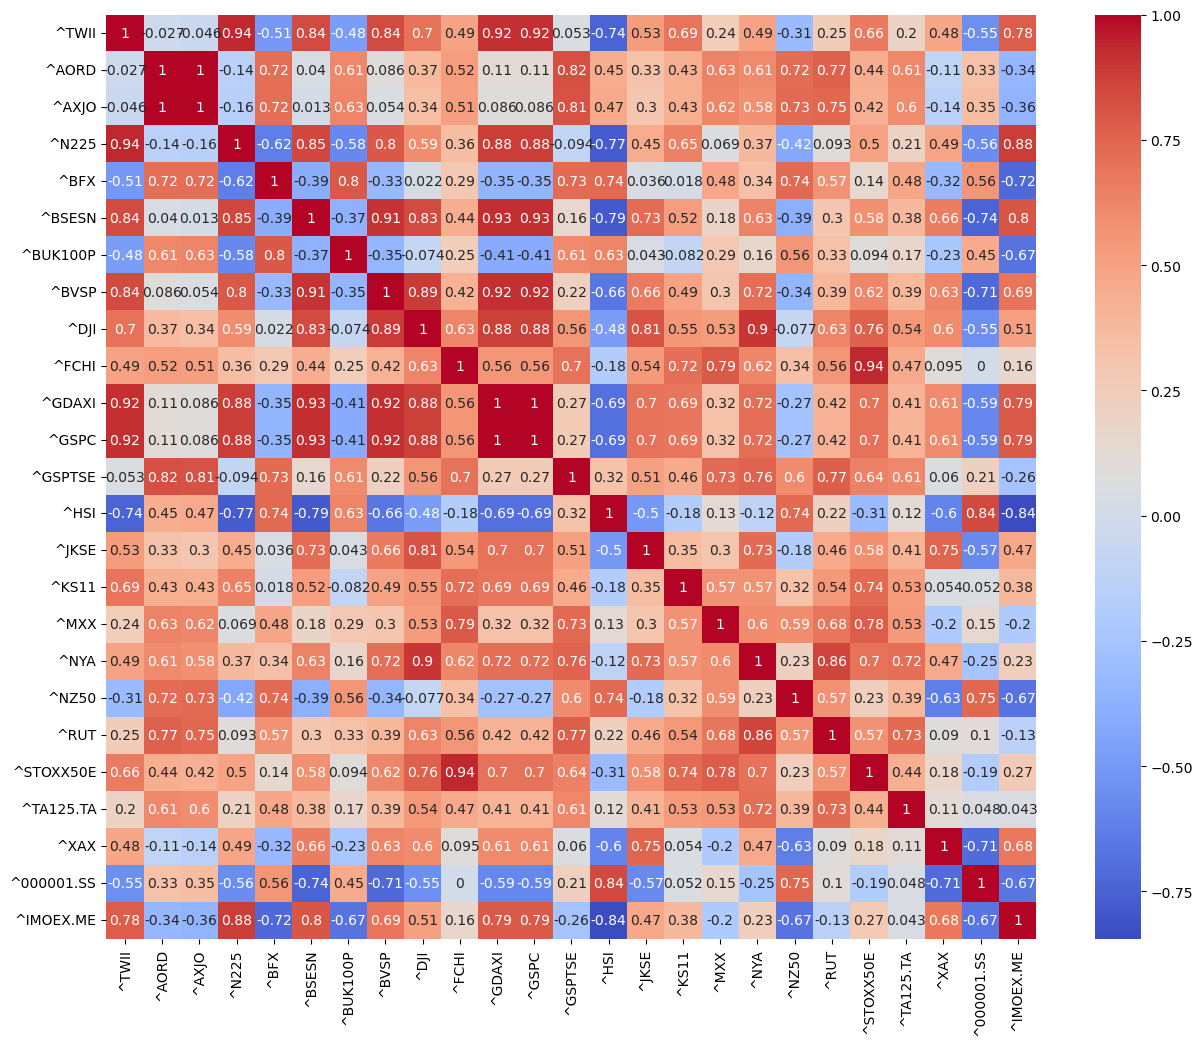

In [139]:
# 各國股市之間的相關度熱圖
import seaborn as sns
corr = stock.iloc[:, 1:].corr(method='pearson').round(3)

plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot = True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 4. 利用清理後的資料訓練模型

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

### 分為訓練資料與測試資料

In [141]:
train, test = train_test_split(stock, random_state=10, train_size=0.8)
x_cols = earlier_stocks + later_stocks
train_x = train[x_cols]
train_y = train[taiwan_stock]

In [142]:
train_x.head()

^AORD        ^AXJO         ^N225         ^BFX        ^BSESN  \
42  7206.899902  7004.000000  32189.730469  3534.850098  65617.843750   
53  7520.399902  7305.000000  32238.890625  3644.179932  65539.421875   
21  7143.799805  6962.000000  27476.869141  3667.159912  57613.718750   
6   7686.100098  7476.700195  27327.109375  3855.459961  59708.078125   
26  7456.700195  7264.100098  29242.820312  3737.510010  61940.199219   

      ^BUK100P     ^BVSP          ^DJI        ^FCHI       ^GDAXI  ...  \
42  725.880005  117220.0  34261.421875  7220.009766  4439.259766  ...   
53  733.390015  115592.0  34765.738281  7260.250000  4404.330078  ...   
21  748.520020  101185.0  32394.250000  7088.339844  3971.270020  ...   
6   775.900024  112303.0  34092.960938  7077.109863  4119.209961  ...   
26  774.130005  107448.0  33531.328125  7361.200195  4137.640137  ...   

          ^KS11          ^MXX          ^NYA         ^NZ50         ^RUT  \
42  2562.489990  54138.140625  15897.309570  11909.809570  1913.359985   
53  2525.639893  53827.710938  15818.110352  11763.110352  1871.520020   
21  2434.939941  53209.101562  14949.349609  11771.269531  1752.630005   
6   2449.800049  55018.910156  16121.250000  12074.040039  1960.810059   
26  2496.510010  55534.679688  15349.169922  11987.299805  1759.510010   

      ^STOXX50E    ^TA125.TA         ^XAX   ^000001.SS    ^IMOEX.ME  
42  4286.560059  1799.420044  4202.589844  3221.370117  2860.330078  
53  4284.270020  1862.339966  4346.089844  3150.129883  3049.459961  
21  4168.209961  1751.060059  4157.629883  3245.379883  2442.189941  
6   4171.439941  1835.050049  4356.529785  3284.919922  2230.149902  
26  4306.759766  1795.359985  4018.600098  3319.149902  2548.629883  

[5 rows x 24 columns]

### 訓練決策樹回歸模型

In [143]:
train_y.head()

42    16652.800781
53    16454.800781
21    15830.309570
6     15265.200195
26    15727.700195
Name: ^TWII, dtype: float64

In [144]:
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)

DecisionTreeRegressor()

In [145]:
clf.get_depth(), clf.get_n_leaves()

(10, 75)

### 驗證預測結果

In [146]:
# 因為前面使用train_test_split函式會將日期順序打亂, 這裡重新排序以便繪圖
test.sort_values('Date', inplace=True)
test_x = test[x_cols]
test_y = test[taiwan_stock]
predict_y = clf.predict(test_x)

In [147]:
test_x.head()

^AORD        ^AXJO         ^N225         ^BFX        ^BSESN  \
1   7336.600098  7131.000000  26175.560547  3899.129883  60105.500000   
3   7605.000000  7388.200195  25822.320312  3954.159912  60655.718750   
14  7544.600098  7336.299805  27473.099609  3889.399902  59744.980469   
19  7263.100098  7068.899902  27229.480469  3652.550049  57634.839844   
34  7319.899902  7129.600098  32506.779297  3650.229980  63142.960938   

      ^BUK100P     ^BVSP          ^DJI        ^FCHI       ^GDAXI  ...  \
1   773.140015  111763.0  33973.011719  6924.189941  3969.610107  ...   
3   785.080017  111439.0  33910.851562  7077.160156  3990.969971  ...   
14  793.349976  107152.0  33045.089844  7299.259766  3991.050049  ...   
19  741.229980  103435.0  32246.550781  7025.720215  3960.280029  ...   
34  760.799988  115488.0  33665.019531  7202.790039  4267.520020  ...   

          ^KS11          ^MXX          ^NYA         ^NZ50         ^RUT  \
1   2359.530029  53209.000000  15749.089844  11646.809570  1844.050049   
3   2379.389893  53128.968750  15883.559570  11881.669922  1884.290039   
14  2417.679932  53180.988281  15530.830078  11812.280273  1894.680054   
19  2377.909912  52505.699219  14830.980469  11699.019531  1771.239990   
34  2615.600098  54291.441406  15469.629883  11759.150391  1888.449951   

      ^STOXX50E    ^TA125.TA         ^XAX   ^000001.SS    ^IMOEX.ME  
1   4099.759766  1845.949951  4134.220215  3161.840088  2186.979980  
3   4174.330078  1887.829956  4204.580078  3224.239990  2196.840088  
14  4242.879883  1765.890015  4138.439941  3291.149902  2212.399902  
19  4116.979980  1709.400024  3985.879883  3226.889893  2258.219971  
34  4291.910156  1789.189941  4097.209961  3197.760010  2694.689941  

[5 rows x 24 columns]

In [148]:
test_y.head()

1     14802.959961
3     14927.009766
14    15563.000000
19    15387.589844
34    16761.660156
Name: ^TWII, dtype: float64

In [149]:
predict_y

array([14932.9296875 , 14751.44042969, 15830.30957031, 15419.96972656,
       17238.140625  , 16870.93945312, 16898.91015625, 16652.80078125,
       16870.93945312, 16893.73046875, 16437.609375  , 16996.        ,
       16432.94921875, 16509.25976562, 16276.0703125 , 16149.6796875 ,
       17137.41992188, 17360.72070312, 17450.63085938])

In [150]:
# 預測結果於實際情況差異
plt.figure(figsize=(15, 6))
plt.plot(test['Date'], test_y, label='True')
plt.plot(test['Date'], predict_y, label='Predict')
plt.legend()

In [151]:
# 預測結果與實際情況的平均差
def get_mean_square_error(y1s, y2s):
    return sum((y1-y2)**2 for y1, y2 in zip(y1s, y2s)) / len(y1s)
mse = get_mean_square_error(test_y, predict_y)
mse**0.5

219.62553640225306

## 5. 選擇高相關的股市資料重新訓練

<Axes: >

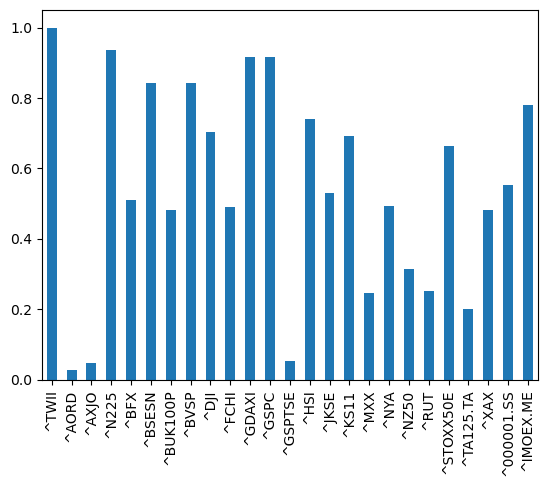

In [152]:
# 查看相關係數的分布狀況
corr = abs(corr[taiwan_stock])
corr.plot.bar()

In [155]:
threshold = 0.90
x_cols = list(corr[corr>threshold].index)
print(x_cols)
train_x = train[x_cols]
train_y = train[taiwan_stock]
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
test_x = test[x_cols]
test_y = test[taiwan_stock]
predict_y = clf.predict(test_x)

plt.figure(figsize=(15, 6))
plt.plot(test['Date'], test_y, label='True')
plt.plot(test['Date'], predict_y, label='Predict')
plt.legend()

['^TWII', '^N225', '^GDAXI', '^GSPC']


In [156]:
mse = get_mean_square_error(test_y, predict_y)
mse**0.5

49.804512233429676

['^TWII', '^N225', '^BSESN', '^BVSP', '^GDAXI', '^GSPC']


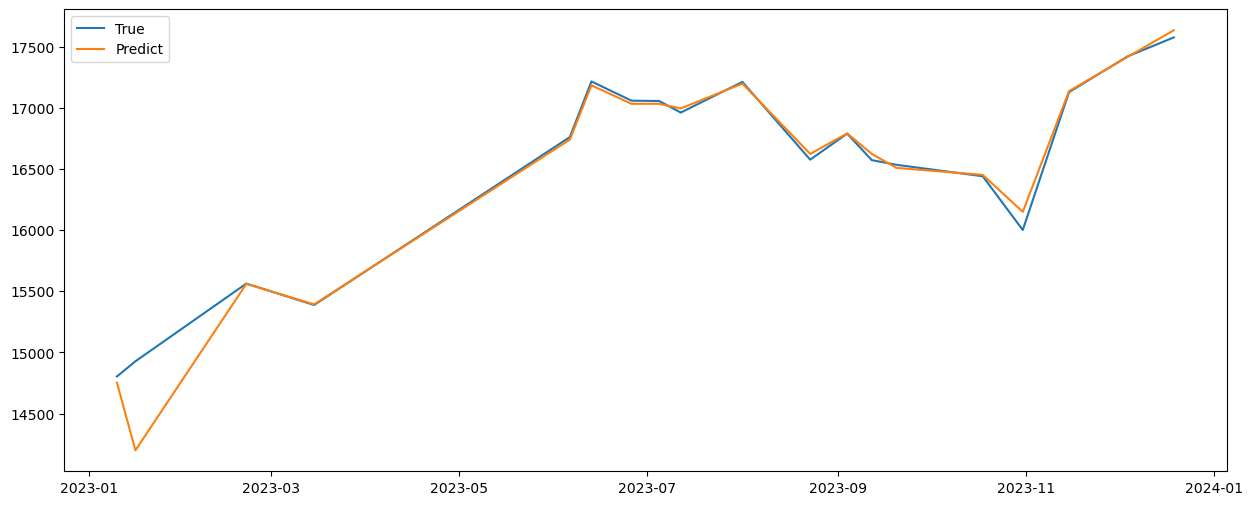

In [157]:
threshold = 0.8
x_cols = list(corr[corr>threshold].index)
print(x_cols)
train_x = train[x_cols]
train_y = train[taiwan_stock]
clf = DecisionTreeRegressor()
clf.fit(train_x, train_y)
test_x = test[x_cols]
test_y = test[taiwan_stock]
predict_y = clf.predict(test_x)

plt.figure(figsize=(15, 6))
plt.plot(test['Date'], test_y, label='True')
plt.plot(test['Date'], predict_y, label='Predict')
plt.legend()

In [158]:
mse = get_mean_square_error(test_y, predict_y)
mse**0.5

172.83807205294465